# Graph exploration

In [68]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx

Data_path = 'Data/'

Load the nodes attributes DataFrame

In [69]:
nodes_attributes_df = pd.read_csv(Data_path+'nodes_attributes.csv')

Load the Adjacency matrix

In [70]:
with open(Data_path+'Adjacency_matrix.pickle', 'rb') as src:
    A = pickle.load(src)
    print(f'>>> Loading Adjacency matrix matrix with shape {A.shape}')

>>> Loading Adjacency matrix matrix with shape (4803, 4803)


In [71]:
# checking that there is the good amount of rows (should equals number of node)
print(f'There are {A.shape[0]} nodes and {nodes_attributes_df.shape[0]} attributes rows.')

There are 4803 nodes and 4803 attributes rows.


In [100]:
# prune the adjacency matrix --> remove poorly nimilar connection
A = np.where(A < 0.24, 0, A)

Build a networkX graph from the adjacency matrix

In [101]:
def graph_summary(G, display=True, return_GC=False):
    """
    Display properties of the given nx.Graph
    ------
    Input 
        |---- G : nx.Graph
    Output 
        |---- None
    """
    # get the giant component:
    G_large = max(nx.connected_component_subgraphs(G), key=len)
    
    G_props = {}
    G_props['n_edges'] = G.number_of_edges()
    G_props['n_nodes'] = G.number_of_nodes()
    G_props['n_connect_comp'] = nx.number_connected_components(G)
    G_props['Giant_component_size'] = G_large.number_of_nodes()
    G_props['avg_degree'] = 2*G_props['n_edges'] /G_props['n_nodes']
    #G_props['GC_diameter'] = nx.diameter(G_large) 
    G_props['avg_cluster_coef'] = nx.average_clustering(G)
    
    if display:
        print('>>> Network Summary:')
        for prop_name, prop_value in G_props.items():
            print(f'\t |---- {prop_name} : {prop_value}')

In [102]:
G=nx.from_numpy_matrix(A)
graph_summary(G)

>>> Network Summary:
	 |---- n_edges : 232707
	 |---- n_nodes : 4803
	 |---- n_connect_comp : 118
	 |---- Giant_component_size : 4665
	 |---- avg_degree : 96.90068707058089
	 |---- avg_cluster_coef : 0.7204229671787205


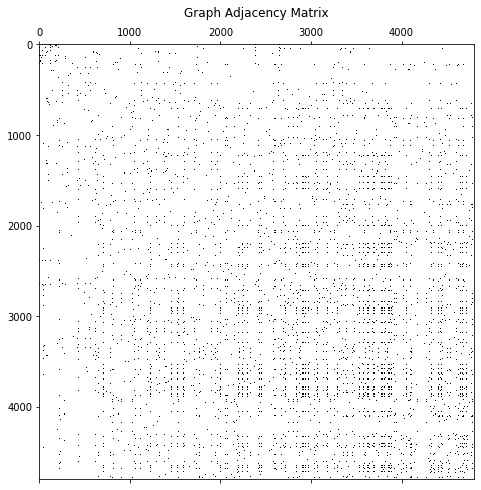

In [103]:
# spy on A
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_title('Graph Adjacency Matrix')
ax.spy(A)
plt.show()

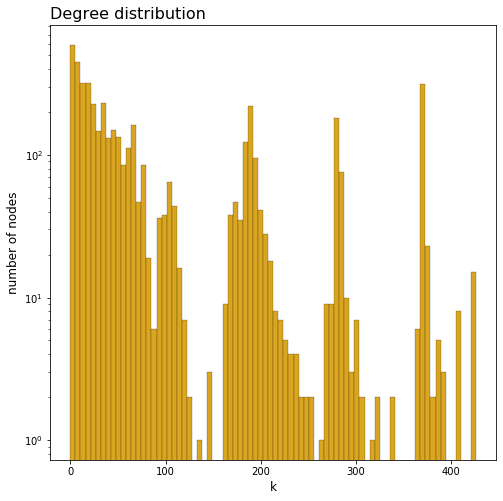

In [104]:
# Degree distribution
degrees = dict(G.degree()).values()

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.hist(degrees, color='goldenrod', bins=80, linewidth=0.2, edgecolor='black')
ax.set_title('Degree distribution', loc='left', fontsize=16)
ax.set_xlabel('k', fontsize=12)
ax.set_ylabel('number of nodes', fontsize=12)
ax.set_yscale('log')
#ax.set_xscale('log')

# TODO : powerlaw / small world

plt.show()

In [105]:
eigenvalues = nx.linalg.spectrum.normalized_laplacian_spectrum(G)

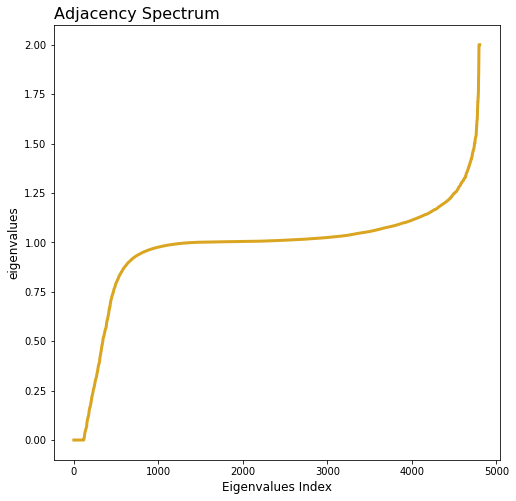

In [106]:
# Spectrum 
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(eigenvalues, color='goldenrod', linewidth=3)
ax.set_title('Adjacency Spectrum', loc='left', fontsize=16)
ax.set_xlabel('Eigenvalues Index', fontsize=12)
ax.set_ylabel('eigenvalues', fontsize=12)
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.show()

## Graph Type 

In [107]:
# --> check if power law (scale free)
# --> check if small world properties

Add the node attributes

In [108]:
nx.set_node_attributes(G, dict(nodes_attributes_df.transpose()))

Get the largest component and display it. 

In [109]:
G_large = max(nx.connected_component_subgraphs(G), key=len)
graph_summary(G_large)

>>> Network Summary:
	 |---- n_edges : 232682
	 |---- n_nodes : 4665
	 |---- n_connect_comp : 1
	 |---- Giant_component_size : 4665
	 |---- avg_degree : 99.75648445873526
	 |---- avg_cluster_coef : 0.7404912135818636


Plot the visual summary for the graph

In [110]:
def get_graph_properties(G):
    """ return the graph parameters in string to be plotted in a table """
    n_edges = G.number_of_edges()
    n_nodes = G.number_of_nodes()
    n_cc = nx.number_connected_components(G)
    GC_size = max(nx.connected_component_subgraphs(G), key=len).number_of_nodes()
    avg_degree = 2*n_edges/n_nodes
    avg_cluster_coef = nx.average_clustering(G)
    
    labels =np.array( ['N edges', 'N nodes', 'N connected\ncomponents', 'Giant Comp. \nsize', 'avg degree', 'avg clustering\ncoefficient'])
    data =  np.array([f'{n_edges:.0f}', f'{n_nodes:.0f}', f'{n_cc:.0f}', f'{GC_size:.0f}', f'{avg_degree:.3f}', f'{avg_cluster_coef :.3f}'])
    return data, labels

In [114]:
# The network to display
the_graph = G
network_name = 'Giant Component'
pos=nx.spring_layout(the_graph)

In [115]:
# compute graph info for table
data_whole, labels = get_graph_properties(G)
data_sub, _ = get_graph_properties(the_graph)
data = np.stack([data_whole, data_sub], axis=1)

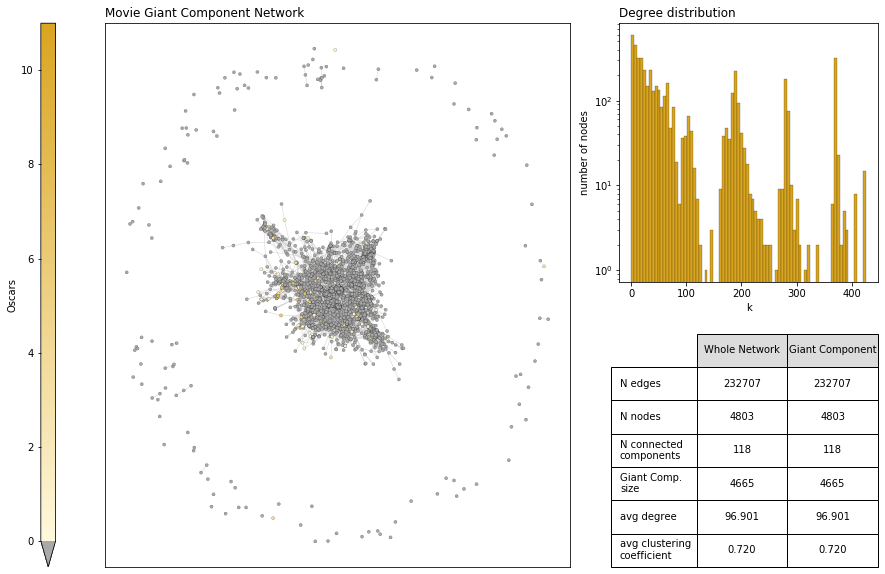

In [116]:
fig = plt.figure(figsize=(15,10))
gs = plt.GridSpec(2, 3, wspace=0.2, hspace=0.1, width_ratios=[0.02, 0.63, 0.35], height_ratios=[0.5, 0.5])
title_fs = 12

# Network visualization
atr = 'Oscars'
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('node_cmap', ['cornsilk', 'goldenrod'])
cmap.set_under(color='darkgray')
ax_net = fig.add_subplot(gs[:,1])
nx.draw_networkx(the_graph, pos, ax=ax_net, \
                                with_labels=False, \
                                node_size=10, \
                                node_color =  list(nx.get_node_attributes(the_graph, atr).values()),\
                                vmin=0.01, cmap=cmap, \
                                alpha=1, \
                                linewidths=0.15, \
                                width=0.5, \
                                edge_color='lightgray')
ax_net.collections[0].set_edgecolor("#000000") 
ax_net.set_title('Movie Giant Component Network', loc='left', fontsize=title_fs)

# colorbar
color_ax = fig.add_subplot(gs[:,0])
nrm = matplotlib.colors.Normalize(vmin=nodes_attributes_df[atr].min(), vmax=nodes_attributes_df[atr].max())
fig.colorbar(matplotlib.cm.ScalarMappable(norm=nrm, cmap=cmap),\
                    cax=color_ax, extend='min')
color_ax.yaxis.set_ticks_position('left')
color_ax.yaxis.set_label_position('left')
color_ax.set_ylabel(atr)

# degree distribution 
ax_deg = fig.add_subplot(gs[0,2])
degrees = dict(the_graph.degree()).values()

ax_deg.hist(degrees, color='goldenrod', bins=80, linewidth=0.2, edgecolor='black', log=True)
ax_deg.set_title('Degree distribution', loc='left', fontsize=title_fs)
ax_deg.set_xlabel('k')
ax_deg.set_ylabel('number of nodes')

# table info
ax_table = fig.add_subplot(gs[1,2])
ax_table.set_axis_off()
table = ax_table.table(cellText=data, rowLabels=labels, cellLoc='center', \
                                     colColours=['gainsboro'] * len(labels), colLabels=['Whole Network', network_name], loc='center', \
                                     bbox=[0.3, 0, 0.7, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1,1)

fig.savefig('Figures/network_summary.png', dpi=200, bbox_inches='tight')
plt.show()